In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Read file CSV
df = pd.read_csv('/content/drive/MyDrive/Portofolio/D- Extreme Gradient Boost for Music Genre Classification- Python/MusicGenreDataset.csv')

# show dataframe
#print(df)

In [36]:
# Specify the features to be removed
features_to_remove = ['filename']

# Remove the specified features from the dataframe
df = df.drop(features_to_remove, axis=1)

In [37]:
# Split the dataset into features (X) and labels (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [38]:
# Apply MinMax scaling on the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.64      0.65       100
           1       0.88      0.90      0.89       100
           2       0.52      0.58      0.55       100
           3       0.53      0.50      0.51       100
           4       0.59      0.56      0.57       100
           5       0.68      0.73      0.70       100
           6       0.79      0.80      0.80       100
           7       0.80      0.78      0.79       100
           8       0.54      0.56      0.55       100
           9       0.39      0.35      0.37       100

    accuracy                           0.64      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.64      0.64      0.64      1000

Confusion Matrix:
[[64  0  9  2  2  9  4  0  2  8]
 [ 0 90  2  0  0  6  0  0  1  1]
 [ 7  2 58  6  0  7  0  3  7 10]
 [ 2  1  5 50 12  0  3  7  5 15]
 [ 3  1  2  9 56  1  7  4 13  4]
 [ 3  6  9  1  0 73  1  1  3  3]
 [

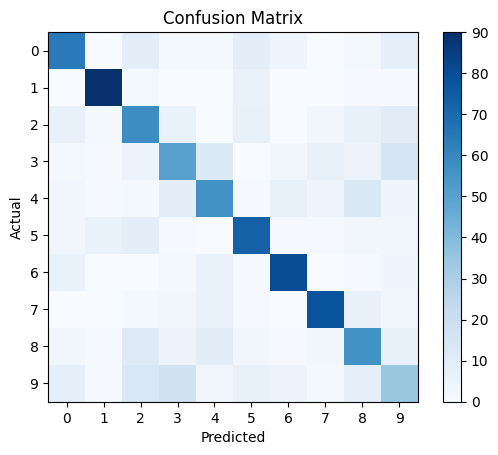

In [39]:
# Create the model
model = XGBClassifier()

# Perform cross-validation
y_pred = cross_val_predict(model, X_scaled, y, cv=10)

# Compute and print other evaluation metrics
report = classification_report(y, y_pred)
print('Classification Report:')
print(report)

# Compute the confusion matrix
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.show()